# Hypothesis Testing in Practice
Importing necessary libraries and loading the example dataset.

This fictitious dataset contains the average height (in centimeters) of undergrad students, as well as categorical information about age and if they drink coffee.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams["axes.titleweight"] = "bold"

np.random.seed(42)

df_full = pd.read_csv("undergrad_students.csv")
df_full.head(3)

,user_id,age,drinks_coffee,height
0,4509,<21,False,163.93
1,1864,>=21,True,167.19
2,2060,<21,False,181.15


## Example 1
We are interested in studying the average height of undergrad students.

**Research Question 1**: the average height of people who drink coffee is greater than 175 cm
+ $H_0: \mu \leq 175$ cm
+ $H_1: \mu > 175$ cm

In [2]:
# Take initial sample of size 200 from the dataset
df_sample = df_full.sample(200)

# Calculate average height of coffee drinkers
sample_mean = df_sample.query("drinks_coffee == True").height.mean()
print(f"Sample Mean: {sample_mean:.2f} cm")

Sample Mean: 173.02 cm


In [3]:
# Generate Sampling Distribution of average height of coffee drinkers
sampling = []

for _ in range(10_000):
    boot_sample = df_sample.sample(len(df_sample), replace=True)
    avg_height_coffee = boot_sample.query("drinks_coffee == True").height.mean()
    sampling.append(avg_height_coffee)

print(f"Sampling Distribution Std: {np.std(sampling):.2f} cm")

Sampling Distribution Std: 0.61 cm


In [4]:
# Assuming the Null is True, generate curve of possible values
null_mean = 175  # closest value possible to the Null

null_curve = np.random.normal(null_mean, np.std(sampling), 10_000)

> **Note:** Since the Alternative is "greater than" ($H_1: \mu > 175$), the shaded area goes from the Sample Mean $\rightarrow$ to the right .

p-value = 0.999


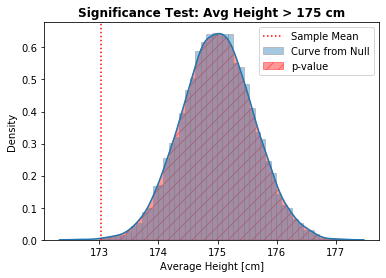

In [5]:
# Plotting
ax = sns.distplot(null_curve, hist_kws={"edgecolor": "gray"}, label="Curve from Null")
line = ax.lines[0]  # retrieve plotted line
line = line.get_xydata()  # get x,y values for the line

alternative = line[(line[:, 0] > sample_mean)]  # data supporting Alternative

x1 = alternative[:, 0]  # all values for first column
y1 = alternative[:, 1]  # all values for second column

ax.fill_between(x1, y1, color="r", alpha=0.4, hatch="//", label="p-value")

plt.axvline(sample_mean, color="r", ls=":", label="Sample Mean")
plt.xlabel("Average Height [cm]")
plt.ylabel("Density")
plt.title("Significance Test: Avg Height > 175 cm")
plt.legend()

# calculate p-value
pvalue = (null_curve > sample_mean).mean()
print(f"p-value = {pvalue:.3f}")

> **Interpretation:**
With such a high p-value (0.94), we **Fail to Reject** the Null Hypotheses. Suggesting the average height of coffee drinkers is equal or lesser than 175 cm.

It looks like the statistic of interest (sample mean) does come from a Normal Distribution centered around 175 (closest value to the Null) and with the Standard Deviation from the Sampling Distribution.

## Example 2

**Research Question 2**: the average height of people who drink coffee is lesser than 175 cm
+ $H_0: \mu \geq 175$ cm
+ $H_1: \mu < 175$ cm


>**Note:** Since the Alternative is "lesser than" ($H_1: \mu < 175$), the shaded area goes from the Sample Mean $\leftarrow$ to the left.

p-value = 0.001


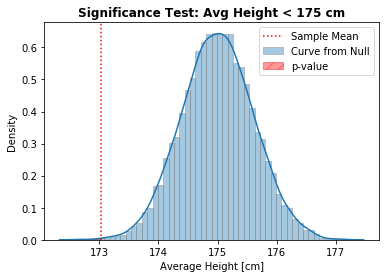

In [6]:
# Plotting
ax = sns.distplot(null_curve, hist_kws={"edgecolor": "gray"}, label="Curve from Null")
line = ax.lines[0]  # retrieve plotted line
line = line.get_xydata()  # get x,y values for the line

alternative = line[(line[:, 0] < sample_mean)]  # data supporting Alternative

x1 = alternative[:, 0]  # all values for first column
y1 = alternative[:, 1]  # all values for second column

ax.fill_between(x1, y1, color="r", alpha=0.4, hatch="//", label="p-value")

plt.axvline(sample_mean, color="r", ls=":", label="Sample Mean")
plt.xlabel("Average Height [cm]")
plt.ylabel("Density")
plt.title("Significance Test: Avg Height < 175 cm")
plt.legend()

# calculate p-value
pvalue = (null_curve < sample_mean).mean()
print(f"p-value = {pvalue:.3f}")

> **Interpretation:**
Since the p-value (0.001) is lesser than $\alpha$ (0.05), we have evidence to **Reject** the Null Hypotheses, suggesting - with 95% of confidence - that the average height of coffee drinkers is indeed smaller than 175 cm.

The statistic of interest (sample mean) is likely to have come from a different distribution.

## Example 3

**Research Question 3**: the average height of people who drink coffee is different than 175 cm
+ $H_0: \mu = 175$ cm
+ $H_1: \mu \neq 175$ cm

>**Note:** Since the Alternative is "different than" ($H_1: \mu \neq 175$), the shaded area goes from the most extreme lower and upper bounds, to the outside.

In [7]:
print(f"Sample Mean: {sample_mean:.2f} cm")
print(f"Null Mean: {null_mean:.2f} cm")

Sample Mean: 173.02 cm
Null Mean: 175.00 cm


Since the Sample Mean is smaller than the Null:
+ **Lower Bound**: Sample Mean
+ **Upper bound**: $NullMean + \Delta(SampleMean, NullMean)$

In [8]:
lower = sample_mean
upper = null_mean + (null_mean - sample_mean)

p-value = 0.001


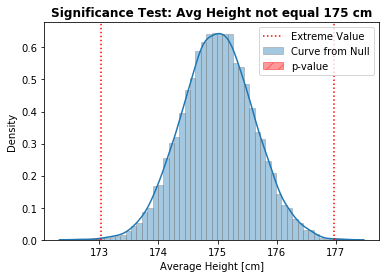

In [9]:
# Plotting
ax = sns.distplot(null_curve, hist_kws={"edgecolor": "gray"}, label="Curve from Null")
line = ax.lines[0]  # retrieve plotted line
line = line.get_xydata()  # get x,y values for the line

alternative_lower = line[(line[:, 0] < lower)]  # data supporting Alternative
alternative_upper = line[(line[:, 0] > upper)]  # data supporting Alternative

x1 = alternative_lower[:, 0]  # all values for first column
y1 = alternative_lower[:, 1]  # all values for second column

x2 = alternative_upper[:, 0]
y2 = alternative_upper[:, 1]

ax.fill_between(x1, y1, color="r", alpha=0.4, hatch="//", label="p-value")
ax.fill_between(x2, y2, color="r", alpha=0.4, hatch="//")

plt.axvline(lower, color="r", ls=":", label="Extreme Value")
plt.axvline(upper, color="r", ls=":")
plt.xlabel("Average Height [cm]")
plt.ylabel("Density")
plt.title("Significance Test: Avg Height not equal 175 cm")
plt.legend()

# calculate p-value
pvalue = (null_curve < lower).mean() + (null_curve > upper).mean()
print(f"p-value = {pvalue:.3f}")

> **Interpretation:**
Since the p-value (0.001) is lesser than $\alpha$ (0.05), we have evidence to **Reject** the Null Hypotheses, suggesting - with 95% of confidence - that the average height of coffee drinkers is indeed **different** than 175 cm.

As a sanity check, this result supports the conclusion from the previous test, where we had evidence suggesting the average height of coffee drinkers to be lesser than 175 cm.

## Main Takeaways
Note how Hypothesis Testing results does not provide a definitive answer. We merely Reject or Fail to Reject the Null Hypothesis. Hence, translating the research question into the hypothesis to be tested is the critical step for this Inference method.

Also, Confidence Interval and Hypothesis Testing only allow to make observations over a Population Parameter. In order to make decisions on the individual level, one should use Machine Learning methods such as Regression and Classification.